In [58]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
data_file = os.path.join(os.getcwd(), "data", "log.csv")

mydf = pd.read_csv(data_file, skiprows=6, delimiter="\t", index_col="Zeit")
mydf.index = pd.to_datetime(mydf.index, unit='s')
#mydf.index = mydf.index.tz_localize ('Europe/Berlin')

#tz='Europe/Berlin'

In [59]:
print(mydf.tail(5))

DC1 U   DC1 I  DC1 P  DC1 T  DC1 S  DC2 U   DC2 I  \
Zeit                                                                     
2020-08-23 08:35:03  284.0  1375.0  391.0    0.0    0.0  228.0  7112.0   
2020-08-23 08:40:03  284.0  1347.0  383.0    0.0    0.0  232.0  4424.0   
2020-08-23 08:45:05  284.0  1420.0  404.0    0.0    0.0  233.0  4353.0   
2020-08-23 08:50:05  285.0  1754.0  500.0    0.0    0.0  234.0  6530.0   
2020-08-23 08:55:06  282.0  1709.0  483.0    0.0    0.0  235.0  5181.0   

                      DC2 P  DC2 T  DC2 S  ...  HC3 P  SOC H  BAT Te  BAT Cy  \
Zeit                                       ...                                 
2020-08-23 08:35:03  1623.0    0.0    0.0  ...    0.0      -       -       -   
2020-08-23 08:40:03  1021.0    0.0    0.0  ...    0.0      -       -       -   
2020-08-23 08:45:05  1025.0    0.0    0.0  ...    0.0      -       -       -   
2020-08-23 08:50:05  1533.0    0.0    0.0  ...    0.0      -       -       -   
2020-08-23 08:55:06  1

Index(['DC1 U', 'DC1 I', 'DC1 P', 'DC1 T', 'DC1 S', 'DC2 U', 'DC2 I', 'DC2 P',
       'DC2 T', 'DC2 S', 'DC3 U', 'DC3 I', 'DC3 P', 'DC3 T', 'DC3 S', 'AC1 U',
       'AC1 I', 'AC1 P', 'AC1 T', 'AC2 U', 'AC2 I', 'AC2 P', 'AC2 T', 'AC3 U',
       'AC3 I', 'AC3 P', 'AC3 T', 'AC F', 'FC I', 'Ain1', 'Ain2', 'Ain3',
       'Ain4', 'AC S', 'Err', 'ENS S', 'ENS Err', 'SH1 P', 'SH2 P', 'SH3 P',
       'SC1 P', 'SC2 P', 'SC3 P', 'HC1 P', 'HC2 P', 'HC3 P', 'SOC H', 'BAT Te',
       'BAT Cy', 'KB S', 'total E', 'OWN E', 'HOME E', 'Iso R', 'Ereignis'],
      dtype='object')


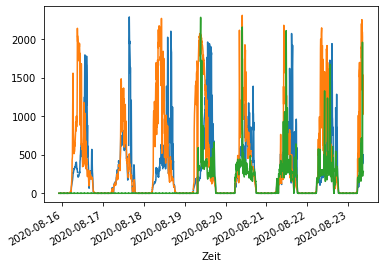

In [60]:

print(mydf.columns)
mydf["DC1 P"].plot()
mydf["DC2 P"].plot()
mydf["HC2 P"].plot()

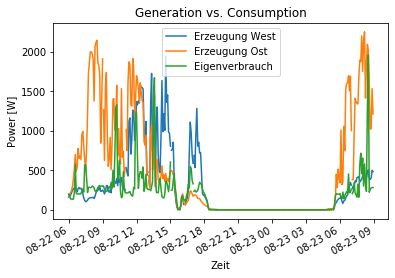

In [63]:
start_date = datetime(2020, 8, 22, 6)
end_date = datetime(2020, 8, 23, 21)

my_range = mydf.loc[start_date:end_date]
plt.figure()
my_range["DC1 P"].plot(label='Erzeugung West')
my_range["DC2 P"].plot(label='Erzeugung Ost')
my_range["HC2 P"].plot(label='Eigenverbrauch')
#my_range.pv_generation.plot(label='Erzeugung gesamt')
#my_range.power_consumption.plot(label='Verbrauch')
plt.ylabel('Power [W]')
plt.title('Generation vs. Consumption')
plt.legend()